In [8]:
import matplotlib.pyplot as plt

In [9]:
X_VALUES = []
Y_VALUES = []
REP_START_FINISH = [
    (30, 35,),
    (35, 40,),
]
with open('pushups.dat') as file:
    for line in file:
        measurement = tuple(float(value) for value in line.split())
        X_VALUES.append(measurement[0])
        Y_VALUES.append(measurement[1])


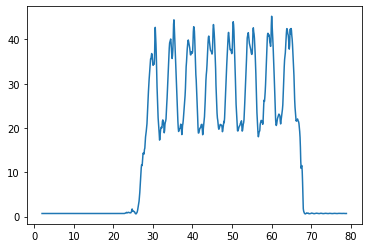

In [10]:
plt.plot(X_VALUES, Y_VALUES)

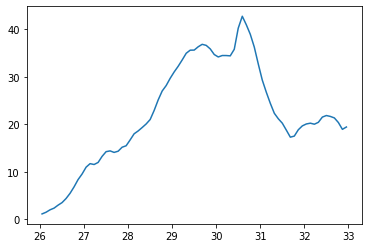

In [15]:
def get_idx(t):
    idx = 0
    while X_VALUES[idx] < t:
        idx += 1
    return idx

start_idx = get_idx(26)
finish_idx = get_idx(33)
plt.plot(X_VALUES[start_idx:finish_idx], Y_VALUES[start_idx:finish_idx])